In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import scipy.stats as st
from scipy.stats import t
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from numpy.random import seed
from numpy.random import randn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix


# World Univesity Ranking Data Cleaning , Plotting, Testing, Prediction

<span><center>Hristina Aleksandrova August, 2021</center><span>

<img src="img/intro2.jpg">

<div style ="font-size: 12px"; font-familu:Artial>University ranking is a hot topic since very long time. Every year, the best-known university rankings publish their yearly result of the top universities in the world.Whether it’s international university rankings like World University Rankings (by Times Higher Education), Academic Ranking of World Universities (by Shanghai University), QS Rankings (by TopUniversities), or local ones like U.S. News Rankings, these lists of prestigious institutions bring a lot of buzz, attention and potential stress to prospective students still considering their study options[1].
For exemple the QS World University Rankings continue to enjoy a remarkably consistent methodological framework, compiled using six simple metrics that we believe effectively capture university performance.Thus, universities continue to be evaluated according to the following six metrics:Academic Reputation, Employer Reputation, Faculty/Student Ratio, Citations per faculty, International Faculty Ratio, International Student Ratio.[2]
Meanwhile the university ranking is far from beeing perfect. Each university ranking uses its own criteria. Some important factors are not measured or they cannot be measured etc.</div>




<h5 style ="font-size: 12px";font-familu:Artial >This note book is using Kaggle data and dataset about World University Rankings</h5>
<span style ="font-size: 12px">@https://www.kaggle.com/mylesoneill/world-university-rankings</span>

<div>
    <p style ="font-size: 12px"; font-familu:Artial><i> This note book explores the World Univesity Rankings dataset in two parts. In the first part the data is creaned and ploted and in the second part the notebook presents an university ranking prediction.</i></p>
</div>


## Investigation:

<containter style ="font-size: 12px">
    <div style ="font-size: 12px">
        <p><center><b> World University Rankings (by Times Higher Education) Methodology:</b></center></p>
            <ul>
                <li>Teaching (the learning environment)</li>
                <li>Research</li>
                <li>Citations</li>
                <li>International outlook (staff, students and research)</li>
                <li>Industry income (knowledge transfer)</li>           
            </ul>
         <p><center><b>ShanghaiRanking's Academic Ranking of World Universities Methodology:</b></center></p>
        <span>Concept addopted from The Human Resources & Labor Review (HRLR)publication about a human competitiveness index. <a href="https://en.wikipedia.org/wiki/College_and_university_rankings#Human_Resources_&_Labor_Review">More information</a> </span>
            <ul>
                <li>Quality of education</li>
                <li>Quality of faculty</li>
                <li>Research output</li>
                <li>Per capita performance</li>          
            </ul>
        <p><center><b>The Center for World University Rankings (CWUR):</b></center></p>
            <ul>
                <li>Quality of Education</li>
                <li>Alumni Employment</li>
                <li>Quality of Faculty</li>
                <li><ul>Research Performance:
                        <li>Research Output</li>
                        <li>High-Quality Publications</li>
                        <li> Influence</li>
                        <li>itations</li>
                    </ul>
                </li>
            </ul>
    </div>
    <div style ="font-size: 12px">
         <p><center><b><i>Nature Index:</i></b></center></p>
            <p>The Nature Index tracks the affiliations of high-quality scientific articles published in 68 science journals independently chosen by the scientific community as the journals scientists would most like to publish their best research in. Updated monthly, the Nature Index presents research reports of approximately 9,000 parent institutions worldwide presenting a page of output statistics for each institution along with information on institutions collaborating with the institution in the publication of Index articles. Each of the approximately 60,000 articles in the Index has a dedicated article page with social and mainstream media coverage tracked by Altmetric. League tables of the output of institutions can be generated on the fly on a global, regional, or country basis and by broad subject area as well as by article count and fractional article count. Compare with other metrics of science (e.g., Impact Factor, h-index), Nature Index is the prominent scientific journal ranking with global reputation on original natural science and life science research</p> <p><center><b><i>G-factor:</i></b></center></p>
            <p>The factor ranks university and college web presence by counting the number of links only from other university websites, using Google search engine data. G-factor is an indicator of the popularity or importance of each university's website from the combined perspectives of other institutions. It claims to be an objective peer review of a university through its website—in social network theory terminology, G-factor measures the centrality of each university's website in the network of university websites</p>


   </div>
</containter>

## Exploration and cleaning Part I:

In [3]:
               """Applicational function"""
#plot
def plot_counts(X, y, xlabel, ylabel, title, figsize=(10,7), xrotate=None, yrotate=None, horizontal=False):
    plt.figure(figsize=figsize)  
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if xrotate:
        plt.xticks(rotation=xrotate)
    if yrotate:
        plt.yticks(rotation=yrotate) 
    if horizontal:
        plt.barh(X, y)
    else:
        plt.bar(X, y)
    plt.plot();

#convert
def convert_int(df, col):
    return df[col].apply(pd.to_numeric)
#converter when "-"
def remove_dash(df, col):
    df.loc[df[col].str.contains("-"), col] = 0
    df[col] = convert_int(df, col)
    return df

In [4]:
                """ Read the datasets"""

education_expenditure_supplementary_data = pd.read_csv("data/education_expenditure_supplementary_data.csv",parse_dates=False ,engine='python')
education_expenditure_supplementary_data.name='education_expenditure_supplementary_data'
shanghai_data = pd.read_csv("data/shanghaiData.csv")
shanghai_data.name='shanghaiData'
times_data= pd.read_csv("data/timesData.csv")
times_data.name='timesData'
cwur_data = pd.read_csv("data/cwurData.csv")
cwur_data.name='cwurData'
school_and_country_table= pd.read_csv("data/school_and_country_table.csv")
school_and_country_table.name='school_and_country_table'

In [5]:
                """All data shape and NaN values"""

datastes_list=[education_expenditure_supplementary_data,shanghai_data,times_data,cwur_data,school_and_country_table]
for x in datastes_list:
    total_values = np.product(x.shape)
    missing_values_count = x.isnull().sum()
    total_missing = missing_values_count.sum()
    percent_missing = (total_missing/total_values) * 100
    print(f"Data Frame : {x.name}") 
    print('Data shape :',x.shape[0],'by', x.shape[1])
    print('Missing data in % :',"{:.2f}".format(percent_missing),'\n')

Data Frame : education_expenditure_supplementary_data
Data shape : 333 by 9
Missing data in % : 40.47 

Data Frame : shanghaiData
Data shape : 4897 by 11
Missing data in % : 7.11 

Data Frame : timesData
Data shape : 2603 by 14
Missing data in % : 1.15 

Data Frame : cwurData
Data shape : 2200 by 14
Missing data in % : 0.65 

Data Frame : school_and_country_table
Data shape : 818 by 2
Missing data in % : 0.00 



###  <center>Shanghai Data</center>

<container >
    <div style ="font-size: 12px">
        4897 universities data here and we have the following columns:
        <ul>
                <li>world_rank: Contains rank ranges and equal ranks (eg. 101-152)</li>
                <li>university_name: name of university </li>
                <li>national_rank: rank of university within its country </li>
                <li>total_score: total score, used to determine rank</li> 
                <li>alumni: Alumni Score, based on the number of alumni of an institution winning nobel prizes and fields medals </li>
                <li>award: Award Score, based on the number of staff of an institution winning Nobel Prizes in Physics, Chemistry, Medicine, and Economics and Fields Medals in Mathematics </li>
                <li>hici: HiCi Score, based on the number of Highly Cited Researchers selected by Thomson Reuters</li>
                <li>ns -- >> renamed to Publication_score: N and S Score, based on the number of papers published in Nature and Science </li>
                <li>pub -- >> PUB Score, based on total number of papers indexed in the Science Citation Index-Expanded and Social Science Citation Index </li>
                <li>national_rank: rank of university within its country </li>
                <li>pcp: PCP Score, the weighted scores of the above five indicators divided by the number of full time academic staff</li> 
                <li>year: year of ranking (2005 to 2015)</li>
            </ul>      
    </div>
</container>




In [6]:
shanghai_data.head(10)

world_rank                              university_name national_rank  \
0          1                           Harvard University             1   
1          2                      University of Cambridge             1   
2          3                          Stanford University             2   
3          4           University of California, Berkeley             3   
4          5  Massachusetts Institute of Technology (MIT)             4   
5          6           California Institute of Technology             5   
6          7                          Columbia University             6   
7          8                         Princeton University             7   
8          9                        University of Chicago             8   
9         10                         University of Oxford             2   

   total_score  alumni  award   hici     ns    pub    pcp  year  
0        100.0   100.0  100.0  100.0  100.0  100.0   72.4  2005  
1         73.6    99.8   93.4   53.3   56.6   70.9   66.9  2005  
2         73.4    41.1   72.2   88.5   70.9   72.3   65.0  2005  
3         72.8    71.8   76.0   69.4   73.9   72.2   52.7  2005  
4         70.1    74.0   80.6   66.7   65.8   64.3   53.0  2005  
5         67.1    59.2   68.6   59.8   65.8   52.5  100.0  2005  
6         62.3    79.4   60.6   56.1   54.2   69.5   45.4  2005  
7         60.9    63.4   76.8   60.9   48.7   48.5   59.1  2005  
8         60.1    75.6   81.9   50.3   44.7   56.4   42.2  2005  
9         59.7    64.3   59.1   48.4   55.6   68.4   53.2  2005

In [7]:
shanghai_data.tail(5)

world_rank                  university_name national_rank  total_score  \
4892    401-500            University of Trieste         11-20          NaN   
4893    401-500           University of Zaragoza          9-13          NaN   
4894    401-500            Utah State University       126-146          NaN   
4895    401-500  Vienna University of Technology           4-6          NaN   
4896    401-500           Wake Forest University       126-146          NaN   

      alumni  award  hici    ns   pub   pcp  year  
4892     0.0    0.0   5.0  10.9  25.1  20.1  2015  
4893     0.0    0.0   7.6   5.1  33.3  13.1  2015  
4894    13.6    0.0   3.6  10.8  25.1  15.5  2015  
4895     0.0    0.0   0.0  12.2  28.8  22.9  2015  
4896     0.0    0.0  14.9   7.5  25.0  11.9  2015

In [8]:
shanghai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4897 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 421.0+ KB


In [9]:
#Rename "N&S column to Publication_score"
shanghai_data.rename(columns={"ns" : "publication_score"}, inplace=True)

In [10]:
shanghai_data.describe().T

count         mean        std     min     25%     50%  \
total_score        1101.0    36.383470  13.557186    23.5    27.4    31.3   
alumni             4896.0     9.161724  14.140636     0.0     0.0     0.0   
award              4895.0     7.691910  15.494110     0.0     0.0     0.0   
hici               4895.0    16.221491  14.382710     0.0     7.3    12.6   
publication_score  4875.0    16.078503  12.511529     0.0     8.0    12.8   
pub                4895.0    38.254648  13.050809     7.3    28.9    36.0   
pcp                4895.0    21.242329   9.254351     8.3    15.6    19.0   
year               4897.0  2009.658566   3.197576  2005.0  2007.0  2009.0   

                      75%     max  
total_score          41.8   100.0  
alumni               15.6   100.0  
award                13.4   100.0  
hici                 21.7   100.0  
publication_score    19.8   100.0  
pub                  45.3   100.0  
pcp                  24.5   100.0  
year               2012.0  2015.0

In [11]:
shanghai_data.isnull().sum()

world_rank              0
university_name         1
national_rank           1
total_score          3796
alumni                  1
award                   2
hici                    2
publication_score      22
pub                     2
pcp                     2
year                    0
dtype: int64

In [12]:
print(f"Total score unique values: {len(pd.unique(shanghai_data.total_score))}")

Total score unique values: 338


In [13]:
               """Applicational function"""
#plot
def plot_counts(X, y, xlabel, ylabel, title, figsize=(10,7), xrotate=None, yrotate=None, horizontal=False):
    plt.figure(figsize=figsize)  
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if xrotate:
        plt.xticks(rotation=xrotate)
    if yrotate:
        plt.yticks(rotation=yrotate) 
    if horizontal:
        plt.barh(X, y)
    else:
        plt.bar(X, y)
    plt.plot();

#convert
def convert_int(df, col):
    return df[col].apply(pd.to_numeric)

def remove_dash(df, col):
    df.loc[df[col].str.contains("-"), col] = ""
    df[col] = convert_int(df, col)
    return df

In [14]:
"""Replace NaN if any"""
shanghai_data = shanghai_data.fillna(method='bfill', axis=0)
print(f"Any NaN column left = {shanghai_data.isnull().any().any()}")

Any NaN column left = True


In [15]:
"""Sorting datafrane by world rank"""
shanghai_data = shanghai_data.sort_values(by ='world_rank').sort_index()

In [16]:
"""Creating score_rank and score column"""
shanghai_data_features = ['alumni', 'award', 'hici', 'publication_score','pub', 'pcp']
shanghai_data['score'] = (shanghai_data[shanghai_data_features].sum(axis=1)/len(shanghai_data_features))*0.1
shanghai_data['score_rank']=(10-shanghai_data.score).apply(np.ceil)
shanghai_data.award=shanghai_data.award*0.1
shanghai_data.head(10)

world_rank                              university_name national_rank  \
0          1                           Harvard University             1   
1          2                      University of Cambridge             1   
2          3                          Stanford University             2   
3          4           University of California, Berkeley             3   
4          5  Massachusetts Institute of Technology (MIT)             4   
5          6           California Institute of Technology             5   
6          7                          Columbia University             6   
7          8                         Princeton University             7   
8          9                        University of Chicago             8   
9         10                         University of Oxford             2   

   total_score  alumni  award   hici  publication_score    pub    pcp  year  \
0        100.0   100.0  10.00  100.0              100.0  100.0   72.4  2005   
1         73.6    99.8   9.34   53.3               56.6   70.9   66.9  2005   
2         73.4    41.1   7.22   88.5               70.9   72.3   65.0  2005   
3         72.8    71.8   7.60   69.4               73.9   72.2   52.7  2005   
4         70.1    74.0   8.06   66.7               65.8   64.3   53.0  2005   
5         67.1    59.2   6.86   59.8               65.8   52.5  100.0  2005   
6         62.3    79.4   6.06   56.1               54.2   69.5   45.4  2005   
7         60.9    63.4   7.68   60.9               48.7   48.5   59.1  2005   
8         60.1    75.6   8.19   50.3               44.7   56.4   42.2  2005   
9         59.7    64.3   5.91   48.4               55.6   68.4   53.2  2005   

      score  score_rank  
0  9.540000         1.0  
1  7.348333         3.0  
2  6.833333         4.0  
3  6.933333         4.0  
4  6.740000         4.0  
5  6.765000         4.0  
6  6.086667         4.0  
7  5.956667         5.0  
8  5.851667         5.0  
9  5.816667         5.0

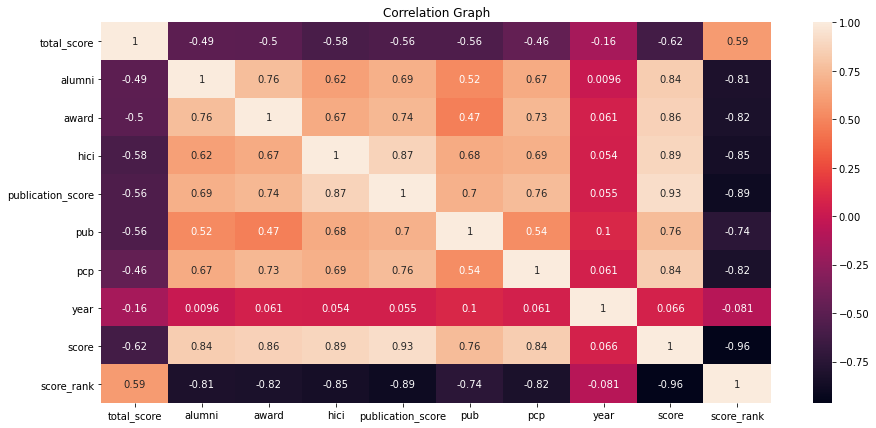

In [17]:
"""Correlation Graph"""

plt.figure(figsize=(15,7))
plt.title("Correlation Graph")
sns.heatmap(shanghai_data.corr(), annot=True)
plt.show()

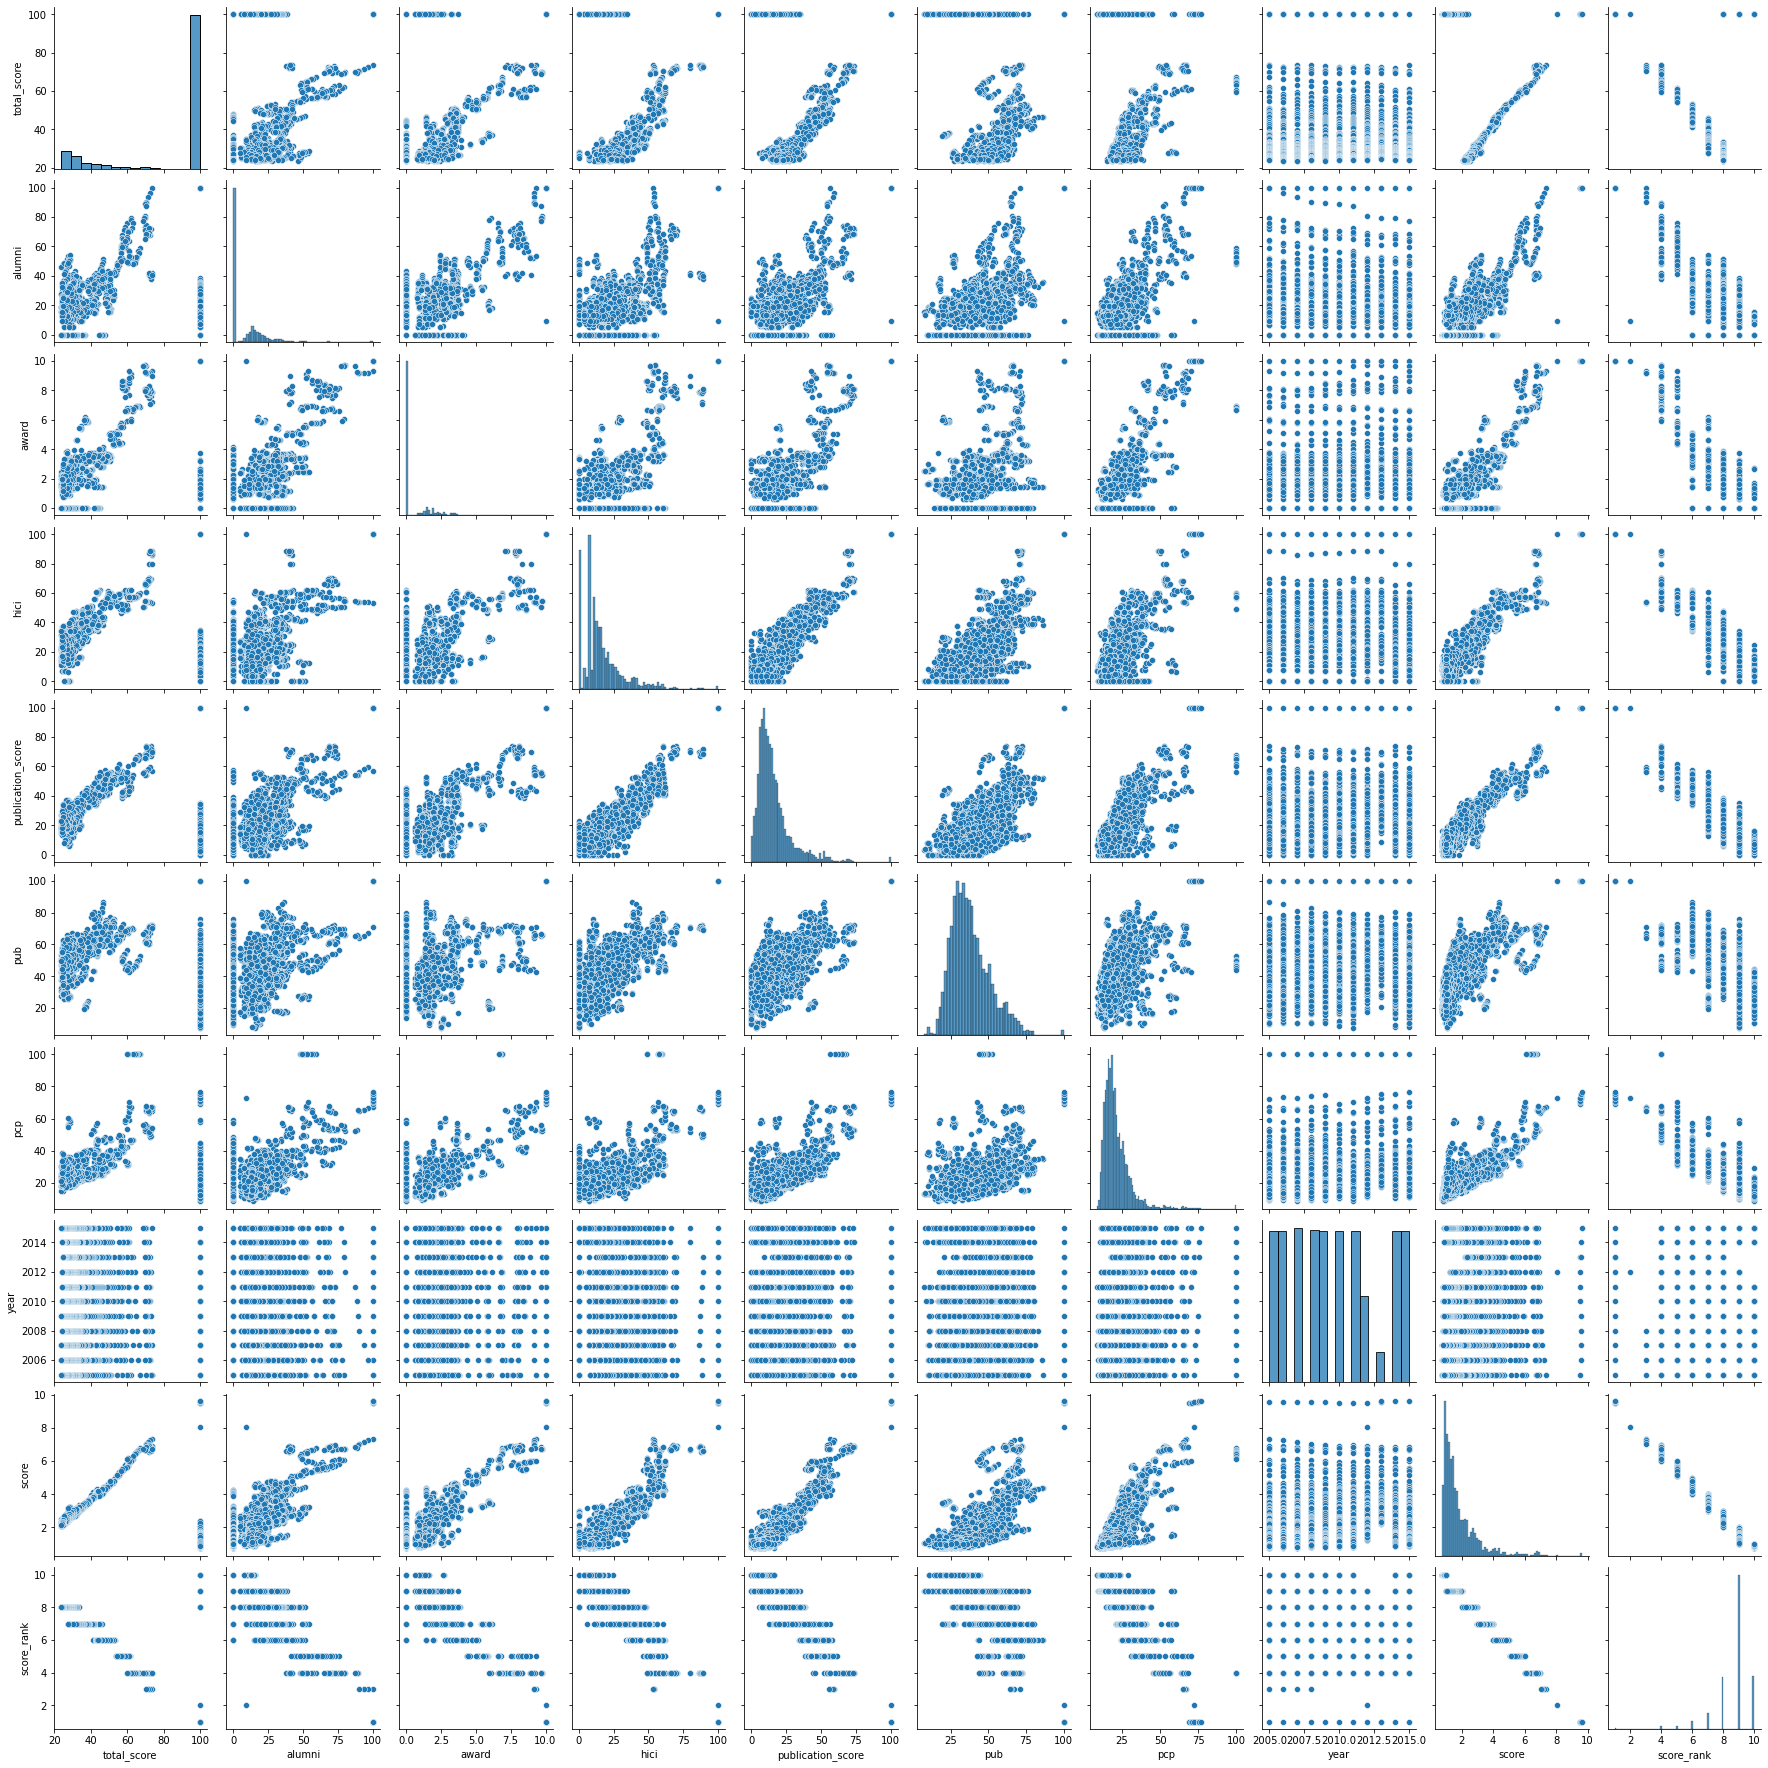

In [18]:
"""Pairplot"""
sns.pairplot(shanghai_data)
plt.show()

In [19]:
"""Plotting Shanhai Data"""

def lineplot(data,tr_1,tr_2):
    # prepare data frame
    df = data.iloc[:10,:]

    # import graph objects as "go"
    import plotly.graph_objs as go
    from plotly.offline import iplot

    # Creating trace1
    trace1 = go.Scatter(
                        x = df[tr_1],
                        y = df[tr_2],
                        mode = "lines+markers",
                        name = "Score rank",
                        marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                        text= df.university_name)
    # Creating trace2
    trace2 = go.Scatter(
                        x = df.world_rank,
                        y = df.national_rank,
                        mode = "lines+markers",
                        name = "National Rank",
                        marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                        text= df.university_name)
    data = [trace1, trace2]
    layout = dict(title = 'New Score Rank and national rank vs World Rank of Top 10 Universities',
                  xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= True)
                 )
    fig = dict(data = data, layout = layout)
    iplot(fig)
lineplot(shanghai_data,'world_rank', 'score_rank')

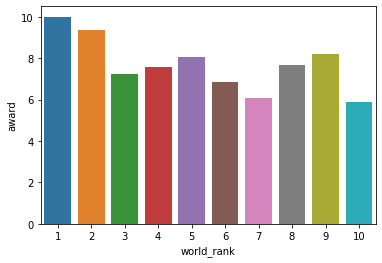

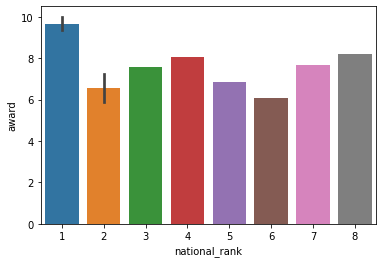

In [20]:
"""Ralation between award and world_rank vs national_rank"""
sns.barplot(x=shanghai_data.world_rank.head(10), y=shanghai_data.award)
plt.show()
sns.barplot(x=shanghai_data.national_rank.head(10), y=shanghai_data.award, )
plt.show()



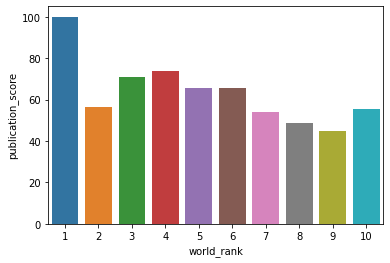

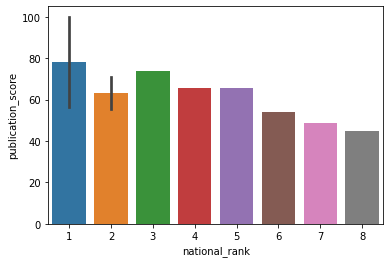

In [21]:
"""Relation between national_rank vs world_rank and publication score in Nature and Science"""
sns.barplot(x=shanghai_data.world_rank.head(10), y=shanghai_data.publication_score)
plt.show()
sns.barplot(x=shanghai_data.national_rank.head(10), y=shanghai_data.publication_score)
plt.show()

In [22]:
"""Taking top 10 universities"""
top_universities = shanghai_data.university_name[0:10]
print(f'Top 10 universities:\n{top_universities}')


Top 10 universities:
0                             Harvard University
1                        University of Cambridge
2                            Stanford University
3             University of California, Berkeley
4    Massachusetts Institute of Technology (MIT)
5             California Institute of Technology
6                            Columbia University
7                           Princeton University
8                          University of Chicago
9                           University of Oxford
Name: university_name, dtype: object


In [23]:
"""Understanding Minimum, maximum and Average Score for all universities"""
shanghai_data_score = shanghai_data.total_score.agg([min,max,'mean']).round(2)

print('Minimum score: {} '.format(shanghai_data_score .values[0]))
print('Maximum score: {} '.format(shanghai_data_score .values[1]))
print('Average score: {} '.format(shanghai_data_score.values[2]))

Minimum score: 23.5 
Maximum score: 100.0 
Average score: 84.42 


In [24]:
"""Analyzing only University of Harvard"""
# Only Harvard University
shanghai_data_harvard = shanghai_data[shanghai_data['university_name'] == ('Harvard University')] 

# Preview of Harvad dataset
shanghai_data_harvard.head(10)

world_rank     university_name national_rank  total_score  alumni  award  \
0             1  Harvard University             1        100.0   100.0   10.0   
500           1  Harvard University             1        100.0   100.0   10.0   
1000          1  Harvard University             1        100.0   100.0   10.0   
1510          1  Harvard University             1        100.0   100.0   10.0   
2013          1  Harvard University             1        100.0   100.0   10.0   
2514          1  Harvard University             1        100.0   100.0   10.0   
3014          1  Harvard University             1        100.0   100.0   10.0   
3514          1  Harvard University             1        100.0   100.0   10.0   
3798          1  Harvard University           1.0        100.0   100.0   10.0   
3896         99  Harvard University             1        100.0   100.0   10.0   

       hici  publication_score    pub   pcp  year     score  score_rank  
0     100.0              100.0  100.0  72.4  2005  9.540000         1.0  
500   100.0              100.0  100.0  73.6  2006  9.560000         1.0  
1000  100.0              100.0  100.0  73.0  2007  9.550000         1.0  
1510  100.0              100.0  100.0  74.1  2008  9.568333         1.0  
2013  100.0              100.0  100.0  74.8  2009  9.580000         1.0  
2514  100.0              100.0  100.0  69.2  2010  9.486667         1.0  
3014  100.0              100.0  100.0  70.5  2011  9.508333         1.0  
3514  100.0              100.0  100.0  71.1  2012  9.518333         1.0  
3798  100.0              100.0  100.0  72.5  2013  9.541667         1.0  
3896  100.0              100.0  100.0  75.3  2013  9.588333         1.0

In [25]:
"""Analyzing only  Wake Forest University"""
# Only Wake Forest University
shanghai_data_wake_forest = shanghai_data[shanghai_data['university_name'] == ('Wake Forest University')] 

# Preview of Wake Forest University dataset
shanghai_data_wake_forest.head(10)

world_rank         university_name national_rank  total_score  alumni  \
294     203-300  Wake Forest University        91-119        100.0     0.0   
794     201-300  Wake Forest University        88-118        100.0     0.0   
1297    203-304  Wake Forest University        89-117        100.0     0.0   
1805    201-302  Wake Forest University        91-114        100.0     0.0   
2412    303-401  Wake Forest University       113-138        100.0     0.0   
2911    301-400  Wake Forest University       112-137        100.0     0.0   
3411    301-400  Wake Forest University       111-137        100.0     0.0   
4294    301-400  Wake Forest University       105-125        100.0     0.0   
4896    401-500  Wake Forest University       126-146          NaN     0.0   

      award  hici  publication_score   pub   pcp  year     score  score_rank  
294     0.0  11.1               10.9  33.4  23.2  2005  1.310000         9.0  
794     0.0  10.9               10.8  34.4  24.1  2006  1.336667         9.0  
1297    0.0  10.5               10.9  33.2  23.2  2007  1.296667         9.0  
1805    0.0  10.3                9.4  33.6  18.8  2008  1.201667         9.0  
2412    0.0  10.3                6.8  32.4  22.5  2009  1.200000         9.0  
2911    0.0  10.2                7.9  33.5  13.8  2010  1.090000         9.0  
3411    0.0  12.5                8.3  31.8  13.1  2011  1.095000         9.0  
4294    0.0  14.9                7.5  25.8  12.0  2014  1.003333         9.0  
4896    0.0  14.9                7.5  25.0  11.9  2015  0.988333        10.0

In [26]:
"""Taking 10 lowest ranked universities""" 
lowest_ranked_universities = shanghai_data.university_name.tail(10)
print(f'Top worst ranked universities:\n{lowest_ranked_universities}')


Top worst ranked universities:
4887     University of Science, Malaysia
4888               University of Seville
4889                University of Surrey
4890                University of Szeged
4891    University of the Basque Country
4892               University of Trieste
4893              University of Zaragoza
4894               Utah State University
4895     Vienna University of Technology
4896              Wake Forest University
Name: university_name, dtype: object


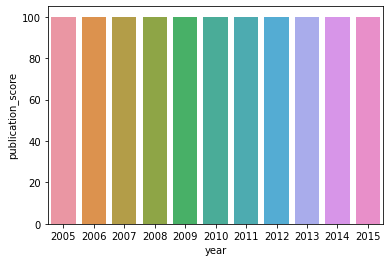

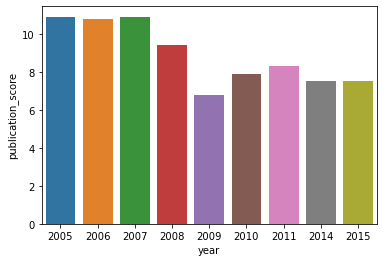

In [27]:
"""Harvard University vs West Forest University publication in Nature and Science per year"""
sns.barplot(x=shanghai_data_harvard.year, y=shanghai_data_harvard.publication_score)
plt.show()
sns.barplot(x=shanghai_data_wake_forest.year, y=shanghai_data_wake_forest.publication_score)
plt.show()


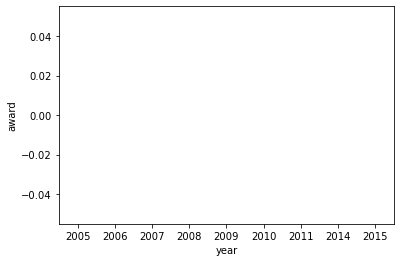

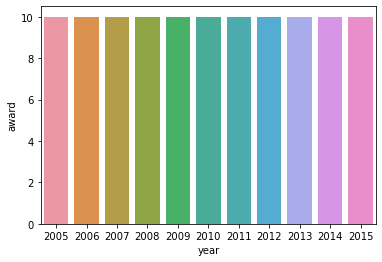

In [28]:
"""Harvard University vs West Forest University awards per year"""
sns.barplot(x=shanghai_data_wake_forest.year, y=shanghai_data_wake_forest.award)
plt.show()
sns.barplot(x=shanghai_data_harvard.year, y=shanghai_data_harvard.award)
plt.show()

###  <center>Times Data</center>
<span style ="font-size: 10px">Most popular methodology</span>

<container >
    <div style ="font-size: 12px">
        2603 universities data here and we have the following columns:
        <ul>
                <li>world_rank: world rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250)</li>
                <li>country: country of each university </li>
                <li>teaching: university score for teaching (the learning environment) </li>
                <li>international: university score international outlook (staff, students, research)</li> 
                <li>research: university score for research (volume, income and reputation) </li>
                <li>citations: university score for citations (research influence) </li>
                <li>income: university score for industry income (knowledge transfer)</li>
                <li>total_score:total score for university, used to determine rank </li>
                <li>national_rank: rank of university within its country </li>
                <li>num_students:number of students at the university</li> 
            </ul>      
    </div>
</container>




In [29]:
times_data.shape

(2603, 14)

In [30]:
times_data.head(10)

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   
5          6                University of Cambridge            United Kingdom   
6          6                   University of Oxford            United Kingdom   
7          8     University of California, Berkeley  United States of America   
8          9                Imperial College London            United Kingdom   
9         10                        Yale University  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9      -        94.2   
5      90.5          77.7      94.1       94.0   57.0        91.2   
6      88.2          77.2      93.9       95.1   73.5        91.2   
7      84.2          39.6      99.3       97.8      -        91.1   
8      89.2          90.0      94.5       88.3   92.9        90.6   
9      92.1          59.2      89.7       91.5      -        89.5   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   
5       18,812                 11.8                    34%           46 : 54   
6       19,919                 11.6                    34%           46 : 54   
7       36,186                 16.4                    15%           50 : 50   
8       15,060                 11.7                    51%           37 : 63   
9       11,751                  4.4                    20%           50 : 50   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011  
5  2011  
6  2011  
7  2011  
8  2011  
9  2011

In [31]:
times_data.tail(10)

world_rank                    university_name         country  teaching  \
2593    601-800         University of West Bohemia  Czech Republic      16.3   
2594    601-800  University of the West of England  United Kingdom      16.9   
2595    601-800       West University of Timişoara         Romania      16.1   
2596    601-800          University of Westminster  United Kingdom      17.3   
2597    601-800                  Xidian University           China      17.9   
2598    601-800                Yeungnam University     South Korea      18.6   
2599    601-800        Yıldız Technical University          Turkey      14.5   
2600    601-800           Yokohama City University           Japan      24.0   
2601    601-800       Yokohama National University           Japan      20.1   
2602    601-800                 Yuan Ze University          Taiwan      16.2   

     international  research  citations income total_score num_students  \
2593          23.1       9.7       29.8   32.1           -       15,639   
2594          48.5      11.2       34.6   28.5           -       22,525   
2595          21.0       3.9       22.4      -           -       12,933   
2596          81.9      11.7       21.1   28.5           -       16,609   
2597          12.8      12.1        8.9   83.7           -       31,618   
2598          24.3      10.9       26.5   35.4           -       21,958   
2599          14.9       7.6       19.3   44.0           -       31,268   
2600          16.1      10.2       36.4   37.9           -        4,122   
2601          23.3      16.0       13.5   40.4           -       10,117   
2602          17.7      18.3       28.6   39.8           -        8,663   

      student_staff_ratio international_students female_male_ratio  year  
2593                 21.5                     2%           52 : 48  2016  
2594                 21.4                    15%           53 : 47  2016  
2595                 19.0                     3%           62 : 38  2016  
2596                 21.0                    43%           57 : 43  2016  
2597                 16.4                     2%           29 : 71  2016  
2598                 15.3                     3%           48 : 52  2016  
2599                 28.7                     2%           36 : 64  2016  
2600                  3.7                     3%               NaN  2016  
2601                 12.1                     8%           28 : 72  2016  
2602                 20.6                     4%           43 : 57  2016

In [32]:
times_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [33]:
times_data.describe().T

count         mean        std     min       25%     50%  \
teaching             2603.0    37.801498  17.604218     9.9    24.700    33.9   
research             2603.0    35.910257  21.254805     2.9    19.600    30.5   
citations            2603.0    60.921629  23.073219     1.2    45.500    62.5   
student_staff_ratio  2544.0    18.445283  11.458698     0.6    11.975    16.1   
year                 2603.0  2014.075682   1.685733  2011.0  2013.000  2014.0   

                         75%     max  
teaching               46.40    99.7  
research               47.25    99.4  
citations              79.05   100.0  
student_staff_ratio    21.50   162.6  
year                 2016.00  2016.0

In [34]:
times_data.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [35]:
print(f"Total score unique values: {len(pd.unique(times_data.total_score))}")

Total score unique values: 415


In [36]:
"""Replace NaN if any"""
times_data = times_data.fillna(method='bfill', axis=0)
print(f"Any NaN column left = {times_data.isnull().any().any()}")

Any NaN column left = False


In [37]:
"""Sort the Df by "country"""
times_data = times_data.sort_values(by ='country').sort_index()


In [38]:
"""Cleaning and modeling data femal_male_ration colum"""

# Replacing '-' with NaN
times_data=times_data.replace('-', np.NaN)
#Replacing NaN values with 0
times_data = times_data.fillna(method='bfill', axis=0)
#Removing white space from left and right!
times_data['female_male_ratio'] = times_data['female_male_ratio'].str.strip()
# new data frame with split value columns
new = times_data["female_male_ratio"].str.split(":", n = 1, expand = True)
# making separate female ratio from new data frame and making sure no white space exist,
#making sure it has a good datatype for ploting

times_data["female_ratio"]= new[0]  
times_data["female_ratio"]=times_data['female_ratio'].str.strip()

#changing column type
times_data.female_ratio = times_data.female_ratio.astype(np.int)
# timesData = timesData.astype({"Female_ratio": int})
# making separate male ratio from new data frame and making sure no white space exist ,
#making sure it has a good datatype for ploting
times_data["male_ratio"]= new[1]  
times_data["male_ratio"]=times_data['male_ratio'].str.strip()
#changing column type
# timesData = timesData.astype({"male_ratio": int})
times_data.male_ratio = times_data.male_ratio.astype(np.int)
# Dropping old female_male_ratio columns
times_data.drop(columns =["female_male_ratio"], inplace = True)
times_data.head()



world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9   57.0        94.2   

  num_students  student_staff_ratio international_students  year  \
0       20,152                  8.9                    25%  2011   
1        2,243                  6.9                    27%  2011   
2       11,074                  9.0                    33%  2011   
3       15,596                  7.8                    22%  2011   
4        7,929                  8.4                    27%  2011   

   female_ratio  male_ratio  
0            33          67  
1            33          67  
2            37          63  
3            42          58  
4            45          55

In [39]:
"""Converting international_students to int"""
times_data.international_students = times_data.international_students.str.strip()
new2 = times_data.international_students.str.split("%", n = 1, expand = True)
times_data.international_students= new2[0]
times_data.international_students=times_data.international_students.str.strip()
times_data.international_students = times_data.international_students.astype(np.int)
times_data.rename(columns={'international_students': 'international_students_in_% ', 'female_ratio': 'female_ratio_in_%', 'male_ratio': 'male_ratio_in_%'}, inplace=True)

In [40]:
"""Converting international, income, total_score and num_students columns to np.float"""
times_data = times_data.astype({"international": float , "income":float , "total_score":float})
times_data.num_students=times_data.num_students.str.replace(',','.')
times_data.num_students = times_data.num_students.apply(pd.to_numeric)
times_data.head(10)

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   
5          6                University of Cambridge            United Kingdom   
6          6                   University of Oxford            United Kingdom   
7          8     University of California, Berkeley  United States of America   
8          9                Imperial College London            United Kingdom   
9         10                        Yale University  United States of America   

   teaching  international  research  citations  income  total_score  \
0      99.7           72.4      98.7       98.8    34.5         96.1   
1      97.7           54.6      98.0       99.9    83.7         96.0   
2      97.8           82.3      91.4       99.9    87.5         95.6   
3      98.3           29.5      98.1       99.2    64.3         94.3   
4      90.9           70.3      95.4       99.9    57.0         94.2   
5      90.5           77.7      94.1       94.0    57.0         91.2   
6      88.2           77.2      93.9       95.1    73.5         91.2   
7      84.2           39.6      99.3       97.8    92.9         91.1   
8      89.2           90.0      94.5       88.3    92.9         90.6   
9      92.1           59.2      89.7       91.5   100.0         89.5   

   num_students  student_staff_ratio  international_students_in_%   year  \
0        20.152                  8.9                            25  2011   
1         2.243                  6.9                            27  2011   
2        11.074                  9.0                            33  2011   
3        15.596                  7.8                            22  2011   
4         7.929                  8.4                            27  2011   
5        18.812                 11.8                            34  2011   
6        19.919                 11.6                            34  2011   
7        36.186                 16.4                            15  2011   
8        15.060                 11.7                            51  2011   
9        11.751                  4.4                            20  2011   

   female_ratio_in_%  male_ratio_in_%  
0                 33               67  
1                 33               67  
2                 37               63  
3                 42               58  
4                 45               55  
5                 46               54  
6                 46               54  
7                 50               50  
8                 37               63  
9                 50               50

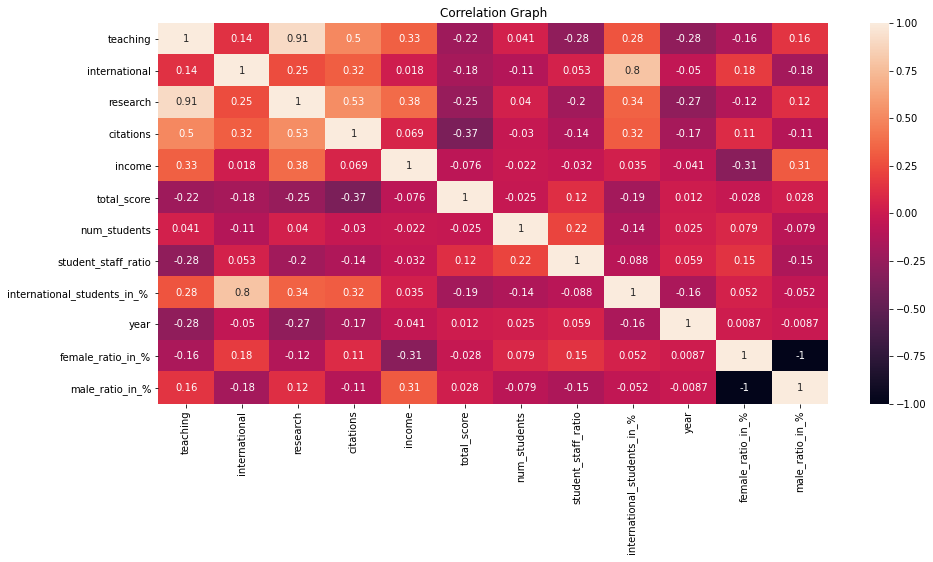

In [41]:
"""Correlation Graph"""

plt.figure(figsize=(15,7))
plt.title("Correlation Graph")
sns.heatmap(times_data.corr(), annot=True)
plt.show()

In [ ]:
"""Pairplot"""
sns.pairplot(times_data)
plt.show()

In [ ]:
# Ploting Times Data

def lineplot_times_data(data,tr_1,tr_2,tr_3):
    # prepare data frame
    df = data.iloc[:20,:]

    # Creating trace1
    trace1 = go.Scatter(
                        x = df[tr_1],
                        y = df[tr_2],
                        mode = "lines+markers",
                        name = "teaching",
                        marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                        text= df.university_name)
    # Creating trace2
    trace2 = go.Scatter(
                        x = df.world_rank,
                        y = df.research,
                        mode = "lines+markers",
                        name = "research",
                        marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                        text= df.university_name)
    # Creating trace3
    trace3 = go.Scatter(
                        x = df[tr_1],
                        y = df[tr_3],
                        mode = "lines+markers",
                        name = "income",
                        marker = dict(color = 'rgba(36,120,153,.4)'),
                        text= df.university_name)
    data = [trace1, trace2 , trace3]
    layout = dict(title = 'teaching, research and income vs world_rank of Top 20 Universities',
                  xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= True)
                 )
    fig = dict(data = data, layout = layout)
    iplot(fig)
lineplot_times_data(times_data,'world_rank', 'teaching','income')

In [ ]:
print(f"Top 10 universities:\n{times_data.university_name.head(10)}")

In [ ]:
print(f"Lowest rated 10 university:\n{times_data.university_name.tail(10)}")

In [ ]:
"""Plot of top  10 countries"""

index = times_data.country.value_counts().head(10).index
value = times_data.country.value_counts().head(10).values
trace1 = go.Bar(
x = index,
y = value,
marker = {"color":"rgba(102,0,102,0.5)"}    
)
data4 = [trace1]

iplot(data4)





In [ ]:
"""Number of students in top 10 universities"""

x = times_data.head(10).university_name
y = times_data.head(10).num_students
colors = ['yellowgreen','red','gold','lightskyblue','violet','lightcoral','blue','pink', 'darkgreen','yellow']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=100, radius=2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(2, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')


In [ ]:
"""Citations vs World Ranks of Top 10 Univesity"""

cond1 = times_data.year == 2014;
cond2 = times_data.year  == 2015;
cond3 = times_data.year == 2016;
df2014 = times_data[cond1].iloc[:10, :];
df2015 = times_data[cond2].iloc[:10, :];
df2016 = times_data[cond3].iloc[:10, :];

trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgb(16, 52, 2, 0.8)'),
                    text = df2014.university_name);

trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgb(116, 112, 20, 0.8)'),
                    text = df2015.university_name);

trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgb(156, 72, 90, 0.8)'),
                    text = df2016.university_name);

data = [trace1, trace2, trace3];
layout = dict(title = "Citation vs World Rank of Top 10 Universities in 2014, 2015 and 2016",
             xaxis = dict(title = "World Rank", ticklen = 5, zeroline = False),
             yaxis = dict(title = "Citation", ticklen = 5, zeroline = False));

fig = dict(data = data, layout = layout);
iplot(fig)


In [ ]:
"""Relation between top 10 total_score and citations"""
sns.barplot(x=times_data.total_score.head(10), y=times_data.citations)
plt.show()


In [ ]:
"""Analyzing only University of Harvard"""
# Only Harvard University
times_data_harvard = times_data[times_data['university_name'] == ('Harvard University')] 

# Preview of Harvad dataset
times_data_harvard.head(10)

In [ ]:
"""Analyzing only Yuan Ze University"""

times_data_yuan_ze = times_data[times_data['university_name'] == ('Yuan Ze University')] 

# Preview of Yuan Ze dataset
times_data_yuan_ze.head(10)

In [ ]:
"""Harvard University vs Yuan Ze University citations per year"""
sns.barplot(x=times_data_harvard.year, y=times_data_harvard.citations)
plt.show()
sns.barplot(x=times_data_yuan_ze.year, y=times_data_yuan_ze.citations)
plt.show()

###  <center>The Center for World University Rankings (CWUR)</center>

<container >
    <div style ="font-size: 12px">
        2200 universities data here and we have the following columns:
        <ul>
            <li>world_rank:world rank for university</li>
            <li>institution: name of university </li>
            <li>country:country of each university</li>
            <li>national_rank: rank ofrank for quality of education</li> 
            <li>quality_of_education: ank for quality of education </li>
            <li>alumni_employment: rank for alumni employment </li>
            <li>quality_of_faculty: rank for quality of faculty</li>
            <li>publicationse:rank for publications </li>
            <li>influence:number of students at the university</li>
            <li>citations:number of students at the university </li>
            <li>broad_impact:rank for broad impact (only available for 2014 and 2015)</li>
            <li>patents:rank for patents</li>
            <li>score:total score, used for determining world rank </li>
            <li>year:year of ranking (2012 to 2015)</li>  
         </ul>      
    </div>
</container>



In [ ]:
cwur_data.shape

In [ ]:
cwur_data.info()

In [ ]:
cwur_data.describe().T

In [ ]:
cwur_data.isnull().sum()

In [ ]:
print(f"Total board_impact unique values: {len(pd.unique(cwur_data.broad_impact))}")

In [ ]:
"""Dropping broad_impact column"""
cwur_data = cwur_data.drop(['broad_impact'], axis = 1)

In [ ]:
"""Replace NaN if any"""
cwur_data = cwur_data.fillna(method='bfill', axis=0)
print(f"Any NaN column left = {cwur_data.isnull().any().any()}")

In [ ]:
cwur_data

In [ ]:
"""Correlation Graph"""

plt.figure(figsize=(15,7))
plt.title("Correlation Graph")
sns.heatmap(cwur_data.corr(), annot=True)
plt.show()

In [ ]:
"""Pairplot"""
sns.pairplot(cwur_data)
plt.show()

In [ ]:
"""Creating estimated_score column"""

cwur_data['estimated_score']=cwur_data.score - (cwur_data.quality_of_education * 0.35 + cwur_data.alumni_employment* 0.45 + cwur_data.influence * 0.20 )

In [ ]:
cwur_data

In [ ]:
cwur_data.head(10)

In [ ]:
fig, axs = plt.subplots(ncols=3 , figsize=(30,12))
sns.pointplot(data=cwur_data.head(3), x='institution', y='world_rank',ax=axs[0]  ,fontsize=120)
sns.pointplot(data=cwur_data.head(3), x='institution', y='score',ax=axs[1])
sns.pointplot(data=cwur_data.head(3), x='institution', y='estimated_score',ax=axs[2])

"""@Youssef Adem plot Kaggle""" 

In [ ]:
"""Ploting CWUR Data"""

def lineplot(data,tr_1,tr_2):
    # prepare data frame
    df = data.iloc[:10,:]


#     from plotly.offline import iplot

    # Creating trace1
    trace1 = go.Scatter(
                        x = df[tr_1],
                        y = df[tr_2],
                        mode = "lines+markers",
                        name = "Quality of education",
                        marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                        text= df.institution)
    # Creating trace2
    trace2 = go.Scatter(
                        x = df.world_rank,
                        y = df.national_rank,
                        mode = "lines+markers",
                        name = "World Rank",
                        marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                        text= df.institution)
    data = [trace1, trace2]
    layout = dict(title = 'Quality of education vs World Rank of Top 10 Universities',
                  xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= True)
                 )
    fig = dict(data = data, layout = layout)
    iplot(fig)
lineplot(cwur_data.head(10),'world_rank', 'quality_of_education')

In [ ]:
"""Relation between eduacation quality and world rank vs education quality and national rank Top 10 universities"""
sns.barplot(x=cwur_data.world_rank.head(10), y=cwur_data.quality_of_education)
plt.show()
sns.barplot(x=cwur_data.national_rank.head(10), y=cwur_data.quality_of_education )
plt.show()

In [ ]:
"""Relatioin between world rank and publication vs national rank and publication Top 10 universities"""
sns.barplot(x=cwur_data.world_rank.head(10), y=cwur_data.publications)
plt.show()
sns.barplot(x=cwur_data.national_rank.head(10), y=cwur_data.publications )
plt.show()

In [ ]:
"""Taking Top 10 Universities"""
top_universities = cwur_data.institution[0:10]
print(f'Top 10 universities:\n{top_universities}')


In [ ]:
"""Taking Worst ranked 10 Universities"""
lowest_ranked_universities = cwur_data.institution.tail(10)
print(f'10 lowest ranked universities:\n{lowest_ranked_universities}')

In [ ]:
"""Plot of top  10 countries"""

index = cwur_data.country.value_counts().head(10).index
value = cwur_data.country.value_counts().head(10).values
trace1 = go.Bar(
x = index,
y = value,
marker = {"color":"rgba(102,0,102,0.5)"}    
)
data4 = [trace1]

iplot(data4)



In [ ]:
"""Number of alumni employed from top 10 universities"""

x = cwur_data.head(10).institution
y = cwur_data.head(10).alumni_employment
colors = ['yellowgreen','red','gold','lightskyblue','violet','lightcoral','blue','pink', 'darkgreen','yellow']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=100, radius=2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(2, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

In [ ]:
"""Plot Top 10 university publications vs influence"""

w_rank = cwur_data.world_rank.head(10)
pub = cwur_data.publications.head(10)
inf = cwur_data.influence.head(10)


plt.plot(w_rank,pub, marker='o')
plt.plot(w_rank, inf, marker='x')

plt.xlabel('World rank')
plt.ylabel('Influence')

plt.title("World_rank")
plt.legend(['Influence', 'Publications']);

In [ ]:
"""Analyzing only University of Harvard"""
# Only Harvard University
cwur_data_harvard = cwur_data[cwur_data['institution'] == ('Harvard University')] 

# Preview of Harvad dataset
cwur_data_harvard.head(10)

In [ ]:
""""Analyzing only China Pharmaceutical University"""
# Only Harvard University
cwur_data_chaina_pharma = cwur_data[cwur_data['institution'] == ('China Pharmaceutical University')] 

# Preview of Harvad dataset
cwur_data_chaina_pharma.head(10)

In [ ]:
"""Harvard University vs China Pharmaceutical University publications per year"""
sns.barplot(x=cwur_data_harvard.year, y=cwur_data_harvard.publications)
plt.show()
sns.barplot(x=cwur_data_chaina_pharma.year, y=cwur_data_chaina_pharma.publications)
plt.show()

## Hypothesis Tesging Sample size: Top 50 universities Shangai Data vs Times Data Part II:
### Student’s t-Test for Independent Samples

In [ ]:
"""Taking samples from Shanghai data and Times data"""
shanghai_sample = shanghai_data[["university_name","total_score"]].head(50)
times_sample =  times_data[["university_name","total_score"]].head(50)



In [ ]:
shanghai_sample.head(5)

In [ ]:
times_sample.head(5)

In [ ]:

"""Creating a histogram of the samples"""
sns.distplot(times_sample.total_score)
plt.show()
sns.distplot(shanghai_sample.total_score)
plt.show()
sns.distplot(times_sample.total_score)
sns.distplot(shanghai_sample.total_score, color = "red")
plt.show()



In [ ]:
"""Taking the mean, standart deviation, standard error of the mean"""

shang_mean = shanghai_sample.total_score.mean()
shang_std = shanghai_sample.total_score.std()
shang_sem = shanghai_sample.total_score.sem()
times_mean = times_sample.total_score.mean()
times_std = times_sample.total_score.std()
times_sem = times_sample.total_score.sem()
print(f"Shanghai sample mean:{shang_mean},Shanghai sample std:{shang_std}, Shanghai sample sem:{shang_sem}")

print(f"Times sample mean:{times_mean},Times sample std:{times_std}, Times sample sem:{times_sem}")

<div  style ="font-size: 14px">
    <p><b>Shanghai metogologie and World University Rankings metogologie, provide they equal or closely similar results based on the values from the total score of the first 50 Universities ?</b></p>
    <div"font-size: 14px;color: red"><i>NB!: This test had been run only  to show an exaple of hypothesis testing confirming that the gap between the methodologie criterias is so big. In the decription of the variable is cleary explained that the criterias are completely different. There isn`t any possiblity that the distribution is similar</i></div>
    <p><b style ="color: blue">Null Hypothesis:</b></p>
    <p style ="color: blue">Yes we can, because the total score features has the same distribution</p>
</div>

##### Fist T test:

In [ ]:

"""Calculatinng Standart error on the difference between the samples"""
sed = np.sqrt(times_sem**2.0 + shang_sem**2.0)
sed

In [ ]:
"""Calculating the t statistics:"""
t_stat = (shang_mean - times_mean) / sed
t_stat

In [ ]:
"""Calculating the degree of freedom"""
df = (len(shanghai_sample) + len(times_sample ) - 2)
df

In [ ]:
"""Calculationg the critical value"""
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)
cv

In [ ]:
"""Calculate the p-value"""
p = (1 - t.cdf(abs(t_stat), df)) * 2
p

In [ ]:
"""Result of the first test:"""
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

<div  style ="font-size: 14px;color: blue">
    <p><b>Result:</b></p>
    <p>Reject the null hypothesis </p>
</div>

##### Second T test:

In [ ]:
"""Diectly initiating SciPy independant ttest function using significant level"""
alpha = 0.05 #signicant level
st.ttest_ind(shanghai_sample.total_score, times_sample.total_score)

In [ ]:
t_stat_second_test, p_values =st.ttest_ind(shanghai_sample.total_score, times_sample.total_score)
print(f"T statistic={t_stat_second_test}, p={p_values}")

In [ ]:
"""Result of the first test:"""
if p_values > alpha: 
    print('Accept null hypothesis that the means are equal.')
    
if p_values < alpha:
    print('Reject the null hypothesis that the means are equal.')

<div  style ="font-size: 14px;color: blue">
    <p><b>Result:</b></p>
    <p>Reject the null hypothesis</p>
</div>

## Predictions Part III:

###  <center>The Center for World University Rankings (CWUR) Linear regression first example:</center>
@Shubham Kamble example 

In [ ]:
LE = LabelEncoder()

In [ ]:
"""Encode the columns"""
c_pred_1 = cwur_data
c_pred_1['institution'] = LE.fit_transform(c_pred_1['institution'])
c_pred_1['country'] = LE.fit_transform(c_pred_1['country'])
c_pred_1.head(10)

In [ ]:
"""Setting the parametters of the Regression"""
X = c_pred_1.drop('world_rank',axis=1)
y = c_pred_1['world_rank']

In [ ]:
scaler = StandardScaler()

In [ ]:
"""Standartization by diving all the values by the standart deviation"""

X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

In [ ]:
"""splitting data arrays into two subsets:"""

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train,y_train)

In [ ]:
print(LR.score(X_test,y_test))

In [ ]:
y_predLR = LR.predict(X_test)

In [ ]:
y_test.head(10)

In [ ]:
y_predLR[:10]


In [ ]:
"""Plotting y tested vs y_predicted"""
sns.distplot(y_test-y_predLR)

###  <center>The Center for World University Rankings (CWUR) Linear regression second example:</center>

In [ ]:
"""Read the data again just for security"""
cwur_data = pd.read_csv("data/cwurData.csv")
cwur_data.head(5)

In [ ]:
"""Inserting testing column""" 

cwur_data.insert(14,"chances",0,True)
cwur_data.head(1)

In [ ]:
"""Assign the chance interval""" 

cwur_data.loc[cwur_data['score']> 20, ['chances']] = '1'
cwur_data.loc[cwur_data['score']< 20, ['chances']] = '0'

In [ ]:
"""Encode the column"""
cwur_data['country']=LE.fit_transform(cwur_data['country'])

In [ ]:
"""Split the data"""

y = cwur_data.chances
cwur_features = ['alumni_employment', 'publications', 'citations', 'national_rank', 
                        'quality_of_education']
X = cwur_data[cwur_features]

train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 7)

In [ ]:
"""Met estimator"""
ran_class=RandomForestClassifier()
ran_class.fit(train_X,train_y)
ran_predict=ran_class.predict(val_X)
print(classification_report(val_y,ran_predict))
accuracy=ran_class.score(val_X,val_y)
print(accuracy*100,'%')


In [ ]:
"""Apply ont the interval"""
train_score = ran_class.score(train_X,train_y)
test_score = ran_class.score(val_X,val_y)
print(f'Training Accuracy of our model is: {train_score}')
print(f'Test Accuracy of our model is: {test_score}')
print()
#prediction of being in top 20
prediction = ran_class.predict(train_X.iloc[15].values.reshape(1,-1))
actual_value = train_y.iloc[15]
print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

i><b>References:</b></i><br>
<font size =0.5><i>[1].Study Portal:https://www.mastersportal.com/articles/2023/5-reasons-why-university-rankings-are-not-perfect.html</i></font><br>
<font size =0.5><i>[2].Top Universities: https://www.topuniversities.com/qs-world-university-rankings/methodology </i> </i></font><br>
<font size =0.5><i>[3].Kaggle: https://www.kaggle.com/mylesoneill/world-university-rankings </i></font><br>
<font size =0.5><i>[4].World University Rankings (by Times Higher Education): "METHODOLOGY FOR OVERALL AND SUBJECT RANKINGS FOR THE
TIMES HIGHER EDUCATION WORLD UNIVERSITY RANKINGS 2021"
September 2020 </i></font><br>
<font size =0.5><i>[5]Shanghairanking:https://www.shanghairanking.com/methodology/arwu/2020</i></font><br>
<font size =0.5><i>[6].Wikipedia: https://en.wikipedia.org/wiki/College_and_university_rankings.</i></font><br>
